In [1]:
import time
import datetime
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from sklearn.cluster import DBSCAN

In [2]:
data = pd.read_csv('data_dec30.csv')
data = DataFrame(data, columns=['Date', 'Time', 'Trend', 'Value', 'Bit'])

In [3]:
def convert(xtime):
	x = time.strptime(xtime,'%H:%M:%S')
	y = datetime.timedelta(hours=x.tm_hour, minutes=x.tm_min, seconds=x.tm_sec).total_seconds()
	return y

In [4]:
data.loc[0, 'Trend'] = 0

In [5]:
for i in range(1, 559):
	sec = convert(data.loc[i, 'Time']) - convert(data.loc[i-1, 'Time'])
	data.loc[i, 'Trend'] = data.loc[i - 1, 'Trend'] + sec

In [6]:
data

,Date,Time,Trend,Value,Bit
0,2015/12/30,15:47:49,0,134,NaN
1,2015/12/30,15:47:51,2,127,NaN
2,2015/12/30,15:47:53,4,139,NaN
3,2015/12/30,15:47:55,6,132,NaN
4,2015/12/30,15:48:2,13,140,NaN
5,2015/12/30,15:48:7,18,133,NaN
6,2015/12/30,15:48:9,20,141,NaN
7,2015/12/30,15:48:11,22,135,NaN
8,2015/12/30,15:48:13,24,132,NaN
9,2015/12/30,15:48:16,27,133,NaN


In [7]:
for i in range(559):
	if 120 <= data.loc[i, 'Value'] <= 160:
		data.loc[i, 'Bit'] = 100
	elif 60 <= data.loc[i, 'Value'] <= 90:
		data.loc[i, 'Bit'] = 200
	else:
		data.loc[i, 'Bit'] = 300

In [8]:
data

,Date,Time,Trend,Value,Bit
0,2015/12/30,15:47:49,0,134,100
1,2015/12/30,15:47:51,2,127,100
2,2015/12/30,15:47:53,4,139,100
3,2015/12/30,15:47:55,6,132,100
4,2015/12/30,15:48:2,13,140,100
5,2015/12/30,15:48:7,18,133,100
6,2015/12/30,15:48:9,20,141,100
7,2015/12/30,15:48:11,22,135,100
8,2015/12/30,15:48:13,24,132,100
9,2015/12/30,15:48:16,27,133,100


In [9]:
df = DataFrame(data, columns=["Trend", "Bit"])

In [10]:
len(df[df.Bit == 300])

33

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df.to_csv('sample.csv', index=False)

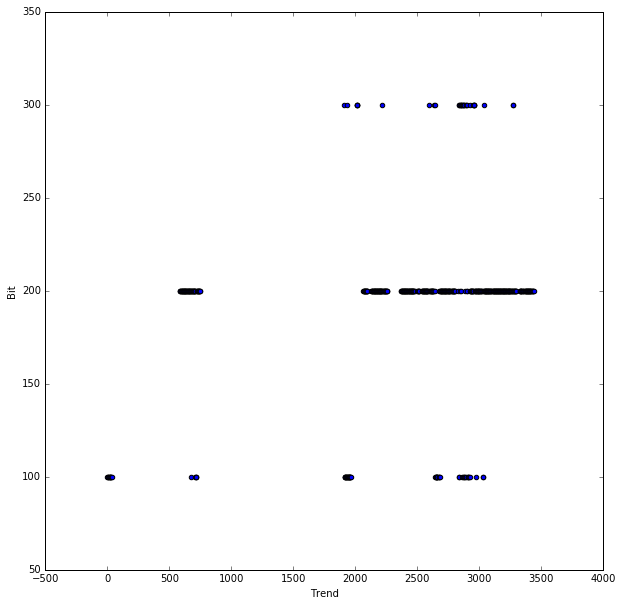

In [13]:
df.plot(kind='scatter', x='Trend', y='Bit', figsize=(10,10))

In [14]:
X = df.as_matrix()
X

array([[  0.00000000e+00,   1.00000000e+02],
       [  2.00000000e+00,   1.00000000e+02],
       [  4.00000000e+00,   1.00000000e+02],
       ..., 
       [  3.43200000e+03,   2.00000000e+02],
       [  3.43400000e+03,   2.00000000e+02],
       [  3.43800000e+03,   2.00000000e+02]])

In [15]:
db = DBSCAN(eps = 9, min_samples=2).fit(X)
db

DBSCAN(algorithm='auto', eps=9, leaf_size=30, metric='euclidean',
    min_samples=2, p=None, random_state=None)

In [16]:
db.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3, -1,  4,  4,  4,
        4,  4,  4,  4, -1,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7, -1,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8

In [21]:
df2 = DataFrame(data, columns=["Value", "Value"])

In [22]:
df2.to_csv("kmeans.csv", Index = False)